# Import Required libraries

In [1]:
import os
import warnings 
warnings.filterwarnings("ignore")
import PyPDF2
import re
import html


from IPython.display import (Markdown, 
                             display)
from tqdm import tqdm

# Embeddings
import tiktoken # Encoding models are TikToken determine the rules for breaking down text into tokens. These models are crucial as they define how the text is split and encoded, impacting 
# the efficiency and language processing tasks 

# langchain serialized dump and load 
from langchain_core.load import dumps, loads

# PromptTemplate 
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts import PromptTemplate

# document wrappers
from langchain_community.document_loaders import PyPDFLoader
from langchain_core.documents import Document

# llm wrappers 
from langchain.chat_models import init_chat_model
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_openai import ChatOpenAI

# summarize chains
from langchain.chains.summarize import load_summarize_chain


### Ingest PDF data

#### Step 1: Extract the full text

In [2]:
book_pdf_filepath = "../data/Harry Potter - Book 1 - The Sorcerers Stone.pdf"

with open(book_pdf_filepath, "rb") as pdf_file:
    data = PyPDF2.PdfReader(pdf_file)
    full_text = " ".join([page.extract_text() for page in data.pages])

### Important step in RAG pipeline is to split the data logically. 


#### Step 2: Create Document Splits On Chapter-Wise

In [3]:
chapter_sections = re.split(r"(CHAPTER\s[A-Z]+(?:\s[A-Z]+)*)", full_text)
print(f"Total Number of Chapters present : {len(chapter_sections)}")

Total Number of Chapters present : 35


In [4]:
chapters = []
for i in range(1, len(chapter_sections), 2):
    chapter_text = chapter_sections[i] + chapter_sections[i+1]
    # Creating langchain Document - chapter wise 
    doc = Document(
        page_content= chapter_text, 
        metadata = {"chapter" : (i//2)+1}
    )

    chapters.append(doc)

try:
    assert(len(chapters) == len(chapter_sections)//2)
    print("==== SUCCESS : CREATE DOCUMENT SPLITS ON CHAPTER WISE =====")
except:
    print("==== FAILURE : CREATE DOCUMENT SPLITS ON CHAPTER WISE =====")

==== SUCCESS : CREATE DOCUMENT SPLITS ON CHAPTER WISE =====


In [5]:
try:
    serialized_chapter = dumps(chapters)
    with open("../data/ingestion_processed/serialized_chapter.json", "w") as f:
        f.write(serialized_chapter)
    print("==== SUCCESS : LANGCHAIN SERIALIZED OBJECT -> CHAPTERS ====")        
except:
    print("==== FAILURE: LANGCHAIN SERIALIZED OBJECT -> CHAPTERS ====")

display(Markdown(chapters[16].page_content+"...."))
print(f"=========={chapters[16].metadata} ==================")

==== SUCCESS : LANGCHAIN SERIALIZED OBJECT -> CHAPTERS ====


CHAPTER	SEVENTEEN
	
THE	MAN	WITH	TWO	FACES
	
I	
t	was	Quirrell.
						
“You!”	gasped	Harry.
						Quirrell	smiled.	His	face	wasn’t	twitching	at	all.
						“Me,”	he	said	calmly.	“I	wondered	whether	I’d	be	meeting	you	here,
Potter.”
						“But	I	thought	—	Snape	—”
						“Severus?”	Quirrell	laughed,	and	it	wasn’t	his	usual	quivering	treble,
either,	but	cold	and	sharp.	“Yes,	Severus	does	seem	the	type,	doesn’t	he?	So
useful	to	have	him	swooping	around	like	an	overgrown	bat.	Next	to	him,	who
would	suspect	p-p-poor,	st-stuttering	P-Professor	Quirrell?”
						Harry	couldn’t	take	it	in.	This	couldn’t	be	true,	it	couldn’t.
						“But	Snape	tried	to	kill	me!”
						“No,	no,	no.	I	tried	to	kill	you.	Your	friend	Miss	Granger	accidentally
knocked	me	over	as	she	rushed	to	set	fire	to	Snape	at	that	Quidditch	match.	She
broke	my	eye	contact	with	you.	Another	few	seconds	and	I’d	have	got	you	off
that	broom.	I’d	have	managed	it	before	then	if	Snape	hadn’t	been	muttering	a
countercurse,	trying	to	save	you.”
						“Snape	was	trying	to	save	me?”
						“Of	course,”	said	Quirrell	coolly.	“Why	do	you	think	he	wanted	to
referee	your	next	match?	He	was	trying	to	make	sure	I	didn’t	do	it	again.	Funny,
really…he	needn’t	have	bothered.	I	couldn’t	do	anything	with	Dumbledore
watching.	All	the	other	teachers	thought	Snape	was	trying	to	stop	Gryffindor
from	winning,	he	did	make	himself	unpopular…and	what	a	waste	of	time,	when
after	all	that,	I’m	going	to	kill	you	tonight.”
						Quirrell	snapped	his	fingers.	Ropes	sprang	out	of	thin	air	and	wrapped
themselves	tightly	around	Harry.
						“You’re	too	nosy	to	live,	Potter.	Scurrying	around	the	school	on
Halloween	like	that,	for	all	I	knew	you’d	seen	me	coming	to	look	at	what	was
guarding	the	Stone.”
						“You	let	the	troll	in?”
						“Certainly.	I	have	a	special	gift	with	trolls	—	you	must	have	seen	what	I
did	to	the	one	in	the	chamber	back	there?	Unfortunately,	while	everyone	else was	running	around	looking	for	it,	Snape,	who	already	suspected	me,	went
straight	to	the	third	floor	to	head	me	off	—	and	not	only	did	my	troll	fail	to	beat
you	to	death,	that	three-headed	dog	didn’t	even	manage	to	bite	Snape’s	leg	off
properly.
						“Now,	wait	quietly,	Potter.	I	need	to	examine	this	interesting	mirror.”
						It	was	only	then	that	Harry	realized	what	was	standing	behind	Quirrell.	It
was	the	Mirror	of	Erised.
						“This	mirror	is	the	key	to	finding	the	Stone,”	Quirrell	murmured,	tapping
his	way	around	the	frame.	“Trust	Dumbledore	to	come	up	with	something	like
this…but	he’s	in	London…I’ll	be	far	away	by	the	time	he	gets	back…”
						All	Harry	could	think	of	doing	was	to	keep	Quirrell	talking	and	stop	him
from	concentrating	on	the	mirror.
						“I	saw	you	and	Snape	in	the	forest	—”	he	blurted	out.
						“Yes,”	said	Quirrell	idly,	walking	around	the	mirror	to	look	at	the	back.
“He	was	on	to	me	by	that	time,	trying	to	find	out	how	far	I’d	got.	He	suspected
me	all	along.	Tried	to	frighten	me	—	as	though	he	could,	when	I	had	Lord
Voldemort	on	my	side….”
						Quirrell	came	back	out	from	behind	the	mirror	and	stared	hungrily	into	it.
						“I	see	the	Stone…I’m	presenting	it	to	my	master…but	where	is	it?”
						Harry	struggled	against	the	ropes	binding	him,	but	they	didn’t	give.	He
had	to	keep	Quirrell	from	giving	his	whole	attention	to	the	mirror.
						“But	Snape	always	seemed	to	hate	me	so	much.”
						“Oh,	he	does,”	said	Quirrell	casually,	“heavens,	yes.	He	was	at	Hogwarts
with	your	father,	didn’t	you	know?	They	loathed	each	other.	But	he	never
wanted	you	dead.”
						“But	I	heard	you	a	few	days	ago,	sobbing	—	I	thought	Snape	was
threatening	you.…”
						For	the	first	time,	a	spasm	of	fear	flitted	across	Quirrell’s	face.
						“Sometimes,”	he	said,	“I	find	it	hard	to	follow	my	master’s	instructions
—	he	is	a	great	wizard	and	I	am	weak	—”
						“You	mean	he	was	there	in	the	classroom	with	you?”	Harry	gasped.
						“He	is	with	me	wherever	I	go,”	said	Quirrell	quietly.	“I	met	him	when	I
traveled	around	the	world.	A	foolish	young	man	I	was	then,	full	of	ridiculous
ideas	about	good	and	evil.	Lord	Voldemort	showed	me	how	wrong	I	was.	There
is	no	good	and	evil,	there	is	only	power,	and	those	too	weak	to	seek	it…Since
then,	I	have	served	him	faithfully,	although	I	have	let	him	down	many	times.	He
has	had	to	be	very	hard	on	me.”	Quirrell	shivered	suddenly.	“He	does	not	forgive
mistakes	easily.	When	I	failed	to	steal	the	stone	from	Gringotts,	he	was	most
displeased.	He	punished	me…decided	he	would	have	to	keep	a	closer	watch	on me.…”
						Quirrell’s	voice	trailed	away.	Harry	was	remembering	his	trip	to	Diagon
Alley	—	how	could	he	have	been	so	stupid?	He’d	seen	Quirrell	there	that	very
day,	shaken	hands	with	him	in	the	Leaky	Cauldron.
						Quirrell	cursed	under	his	breath.
						“I	don’t	understand…is	the	Stone	inside	the	mirror?	Should	I	break	it?”
						Harry’s	mind	was	racing.
						What	I	want	more	than	anything	else	in	the	world	at	the	moment,	he
thought,	is	to	find	the	Stone	before	Quirrell	does.	So	if	I	look	in	the	mirror,	I
should	see	myself	finding	it	—	which	means	I’ll	see	where	it’s	hidden!	But	how
can	I	look	without	Quirrell	realizing	what	I’m	up	to?
						He	tried	to	edge	to	the	left,	to	get	in	front	of	the	glass	without	Quirrell
noticing,	but	the	ropes	around	his	ankles	were	too	tight:	he	tripped	and	fell	over.
Quirrell	ignored	him.	He	was	still	talking	to	himself.
						“What	does	this	mirror	do?	How	does	it	work?	Help	me,	Master!”
						And	to	Harry’s	horror,	a	voice	answered,	and	the	voice	seemed	to	come
from	Quirrell	himself.
						“Use	the	boy…Use	the	boy.…”
						Quirrell	rounded	on	Harry.
						“Yes	—	Potter	—	come	here.”
						He	clapped	his	hands	once,	and	the	ropes	binding	Harry	fell	off.	Harry
got	slowly	to	his	feet.
						“Come	here,”	Quirrell	repeated.	“Look	in	the	mirror	and	tell	me	what
you	see.”
						Harry	walked	toward	him.
						
I	must	lie,	he	thought	desperately.	I	must	look	and	lie	about	what	I	see,
that’s	all.
						Quirrell	moved	close	behind	him.	Harry	breathed	in	the	funny	smell	that
seemed	to	come	from	Quirrell’s	turban.	He	closed	his	eyes,	stepped	in	front	of
the	mirror,	and	opened	them	again.
						He	saw	his	reflection,	pale	and	scared-looking	at	first.	But	a	moment
later,	the	reflection	smiled	at	him.	It	put	its	hand	into	its	pocket	and	pulled	out	a
blood-red	stone.	It	winked	and	put	the	Stone	back	in	its	pocket	—	and	as	it	did
so,	Harry	felt	something	heavy	drop	into	his	real	pocket.	Somehow	—	incredibly
—	he’d	gotten	the	Stone.
						“Well?”	said	Quirrell	impatiently.	“What	do	you	see?”
						Harry	screwed	up	his	courage.
						“I	see	myself	shaking	hands	with	Dumbledore,”	he	invented.	“I	—	I’ve
won	the	house	cup	for	Gryffindor.” 						Quirrell	cursed	again.
						“Get	out	of	the	way,”	he	said.	As	Harry	moved	aside,	he	felt	the
Sorcerer’s	Stone	against	his	leg.	Dare	he	make	a	break	for	it?
						But	he	hadn’t	walked	five	paces	before	a	high	voice	spoke,	though
Quirrell	wasn’t	moving	his	lips.
						“He	lies…He	lies.…”
						“Potter,	come	back	here!”	Quirrell	shouted.	“Tell	me	the	truth!	What	did
you	just	see?”
						The	high	voice	spoke	again.
						“Let	me	speak	to	him…face-to-face…”
						“Master,	you	are	not	strong	enough!”
						“I	have	strength	enough…for	this…”
						Harry	felt	as	if	Devil’s	Snare	was	rooting	him	to	the	spot.	He	couldn’t
move	a	muscle.	Petrified,	he	watched	as	Quirrell	reached	up	and	began	to
unwrap	his	turban.	What	was	going	on?	The	turban	fell	away.	Quirrell’s	head
looked	strangely	small	without	it.	Then	he	turned	slowly	on	the	spot.
						Harry	would	have	screamed,	but	he	couldn’t	make	a	sound.	Where	there
should	have	been	a	back	to	Quirrell’s	head,	there	was	a	face,	the	most	terrible
face	Harry	had	ever	seen.	It	was	chalk	white	with	glaring	red	eyes	and	slits	for
nostrils,	like	a	snake.
						“Harry	Potter…”	it	whispered.
						Harry	tried	to	take	a	step	backward	but	his	legs	wouldn’t	move.
						“See	what	I	have	become?”	the	face	said.	“Mere	shadow	and	vapor….I
have	form	only	when	I	can	share	another’s	body…but	there	have	always	been
those	willing	to	let	me	into	their	hearts	and	minds…Unicorn	blood	has
strengthened	me,	these	past	weeks…you	saw	faithful	Quirrell	drinking	it	for	me
in	the	forest…and	once	I	have	the	Elixir	of	Life,	I	will	be	able	to	create	a	body
of	my	own….Now…why	don’t	you	give	me	that	Stone	in	your	pocket?”
						So	he	knew.	The	feeling	suddenly	surged	back	into	Harry’s	legs.	He
stumbled	backward.
						“Don’t	be	a	fool,”	snarled	the	face.	“Better	save	your	own	life	and	join
me…or	you’ll	meet	the	same	end	as	your	parents…They	died	begging	me	for
mercy…”
						“LIAR!”	Harry	shouted	suddenly.
						Quirrell	was	walking	backward	at	him,	so	that	Voldemort	could	still	see
him.	The	evil	face	was	now	smiling.
						“How	touching…”	it	hissed.	“I	always	value	bravery….Yes,	boy,	your
parents	were	brave…I	killed	your	father	first;	and	he	put	up	a	courageous
fight…but	your	mother	needn’t	have	died…she	was	trying	to	protect	you…Now give	me	the	Stone,	unless	you	want	her	to	have	died	in	vain.”
						“NEVER!”
						Harry	sprang	toward	the	flame	door,	but	Voldemort	screamed	“SEIZE
HIM!”	and	the	next	second,	Harry	felt	Quirrell’s	hand	close	on	his	wrist.	At
once,	a	needle-sharp	pain	seared	across	Harry’s	scar;	his	head	felt	as	though	it
was	about	to	split	in	two;	he	yelled,	struggling	with	all	his	might,	and	to	his
surprise,	Quirrell	let	go	of	him.	The	pain	in	his	head	lessened	—	he	looked
around	wildly	to	see	where	Quirrell	had	gone,	and	saw	him	hunched	in	pain,
looking	at	his	fingers	—	they	were	blistering	before	his	eyes.
						“Seize	him!	SEIZE	HIM!”	shrieked	Voldemort	again,	and	Quirrell
lunged,	knocking	Harry	clean	off	his	feet	landing	on	top	of	him,	both	hands
around	Harry’s	neck	—	Harry’s	scar	was	almost	blinding	him	with	pain,	yet	he
could	see	Quirrell	howling	in	agony.
						“Master,	I	cannot	hold	him	—	my	hands	—	my	hands!”
						And	Quirrell,	though	pinning	Harry	to	the	ground	with	his	knees,	let	go
of	his	neck	and	stared,	bewildered,	at	his	own	palms	—	Harry	could	see	they
looked	burned,	raw,	red,	and	shiny.
						“Then	kill	him,	fool,	and	be	done!”	screeched	Voldemort.
						Quirrell	raised	his	hand	to	perform	a	deadly	curse,	but	Harry,	by	instinct,
reached	up	and	grabbed	Quirrell’s	face	—
						“AAAARGH!”
						Quirrell	rolled	off	him,	his	face	blistering,	too,	and	then	Harry	knew:
Quirrell	couldn’t	touch	his	bare	skin,	not	without	suffering	terrible	pain	—	his
only	chance	was	to	keep	hold	of	Quirrell,	keep	him	in	enough	pain	to	stop	him
from	doing	a	curse.
						Harry	jumped	to	his	feet,	caught	Quirrell	by	the	arm,	and	hung	on	as	tight
as	he	could.	Quirrell	screamed	and	tried	to	throw	Harry	off	—	the	pain	in
Harry’s	head	was	building	—	he	couldn’t	see	—	he	could	only	hear	Quirrell’s
terrible	shrieks	and	Voldemort’s	yells	of,	“KILL	HIM!	KILL	HIM!”	and	other
voices,	maybe	in	Harry’s	own	head,	crying,	“Harry!	Harry!”
						He	felt	Quirrell’s	arm	wrenched	from	his	grasp,	knew	all	was	lost,	and
fell	into	blackness,	down…down…	down….
	
Something	gold	was	glinting	just	above	him.	The	Snitch!	He	tried	to	catch	it,
but	his	arms	were	too	heavy.
						He	blinked.	It	wasn’t	the	Snitch	at	all.	It	was	a	pair	of	glasses.	How
strange.
						He	blinked	again.	The	smiling	face	of	Albus	Dumbledore	swam	into
view	above	him. 						“Good	afternoon,	Harry,”	said	Dumbledore.
						Harry	stared	at	him.	Then	he	remembered:	“Sir!	The	Stone!	It	was
Quirrell!	He’s	got	the	Stone!	Sir,	quick	—”
						“Calm	yourself,	dear	boy,	you	are	a	little	behind	the	times,”	said
Dumbledore.	“Quirrell	does	not	have	the	Stone.”
						“Then	who	does?	Sir,	I	—”
						“Harry,	please	relax,	or	Madam	Pomfrey	will	have	me	thrown	out.”
						Harry	swallowed	and	looked	around	him.	He	realized	he	must	be	in	the
hospital	wing.	He	was	lying	in	a	bed	with	white	linen	sheets,	and	next	to	him
was	a	table	piled	high	with	what	looked	like	half	the	candy	shop.
						“Tokens	from	your	friends	and	admirers,”	said	Dumbledore,	beaming.
“What	happened	down	in	the	dungeons	between	you	and	Professor	Quirrell	is	a
complete	secret,	so,	naturally,	the	whole	school	knows.	I	believe	your	friends
Misters	Fred	and	George	Weasley	were	responsible	for	trying	to	send	you	a	toilet
seat.	No	doubt	they	thought	it	would	amuse	you.	Madam	Pomfrey,	however,	felt
it	might	not	be	very	hygienic,	and	confiscated	it.”
						“How	long	have	I	been	in	here?”
						“Three	days.	Mr.	Ronald	Weasley	and	Miss	Granger	will	be	most
relieved	you	have	come	round,	they	have	been	extremely	worried.”
						“But	sir,	the	Stone	—”
						“I	see	you	are	not	to	be	distracted.	Very	well,	the	Stone.	Professor
Quirrell	did	not	manage	to	take	it	from	you.	I	arrived	in	time	to	prevent	that,
although	you	were	doing	very	well	on	your	own,	I	must	say.”
						“You	got	there?	You	got	Hermione’s	owl?”
						“We	must	have	crossed	in	midair.	No	sooner	had	I	reached	London	than
it	became	clear	to	me	that	the	place	I	should	be	was	the	one	I	had	just	left.	I
arrived	just	in	time	to	pull	Quirrell	off	you.”
						“It	was	you.”
						“I	feared	I	might	be	too	late.”
						“You	nearly	were,	I	couldn’t	have	kept	him	off	the	Stone	much	longer	–”
						“Not	the	Stone,	boy,	you	—	the	effort	involved	nearly	killed	you.	For	one
terrible	moment	there,	I	was	afraid	it	had.	As	for	the	Stone,	it	has	been
destroyed.”
						“Destroyed?”	said	Harry	blankly.	“But	your	friend	—	Nicolas	Flamel	—”
						“Oh,	you	know	about	Nicolas?”	said	Dumbledore,	sounding	quite
delighted.	“You	did	do	the	thing	properly,	didn’t	you?	Well,	Nicolas	and	I	have
had	a	little	chat,	and	agreed	it’s	all	for	the	best.”
						“But	that	means	he	and	his	wife	will	die,	won’t	they?”
						“They	have	enough	Elixir	stored	to	set	their	affairs	in	order	and	then,	yes, they	will	die.”
						Dumbledore	smiled	at	the	look	of	amazement	on	Harry’s	face.
						“To	one	as	young	as	you,	I’m	sure	it	seems	incredible,	but	to	Nicolas	and
Perenelle,	it	really	is	like	going	to	bed	after	a	very,	very	long	day.	After	all,	to	the
well-organized	mind,	death	is	but	the	next	great	adventure.	You	know,	the	Stone
was	really	not	such	a	wonderful	thing.	As	much	money	and	life	as	you	could
want!	The	two	things	most	human	beings	would	choose	above	all	—	the	trouble
is,	humans	do	have	a	knack	of	choosing	precisely	those	things	that	are	worst	for
them.”
						Harry	lay	there,	lost	for	words.	Dumbledore	hummed	a	little	and	smiled
at	the	ceiling.
						“Sir?”	said	Harry.	“I’ve	been	thinking…sir	—	even	if	the	Stone’s	gone,
Vol-,	I	mean,	You-Know-Who	—”
						“Call	him	Voldemort,	Harry.	Always	use	the	proper	name	for	things.	Fear
of	a	name	increases	fear	of	the	thing	itself.”
						“Yes,	sir.	Well,	Voldemort’s	going	to	try	other	ways	of	coming	back,	isn’t
he?	I	mean,	he	hasn’t	gone,	has	he?”
						“No,	Harry,	he	has	not.	He	is	still	out	there	somewhere,	perhaps	looking
for	another	body	to	share…not	being	truly	alive,	he	cannot	be	killed.	He	left
Quirrell	to	die;	he	shows	just	as	little	mercy	to	his	followers	as	his	enemies.
Nevertheless,	Harry,	while	you	may	only	have	delayed	his	return	to	power,	it
will	merely	take	someone	else	who	is	prepared	to	fight	what	seems	a	losing
battle	next	time	—	and	if	he	is	delayed	again,	and	again,	why,	he	may	never
return	to	power.”
						Harry	nodded,	but	stopped	quickly,	because	it	made	his	head	hurt.	Then
he	said,	“Sir,	there	are	some	other	things	I’d	like	to	know,	if	you	can	tell	me…
things	I	want	to	know	the	truth	about.…”
						“The	truth.”	Dumbledore	sighed.	“It	is	a	beautiful	and	terrible	thing,	and
should	therefore	be	treated	with	great	caution.	However,	I	shall	answer	your
questions	unless	I	have	a	very	good	reason	not	to,	in	which	case	I	beg	you’ll
forgive	me.	I	shall	not,	of	course,	lie.”
						“Well…Voldemort	said	that	he	only	killed	my	mother	because	she	tried
to	stop	him	from	killing	me.	But	why	would	he	want	to	kill	me	in	the	first
place?”
						Dumbledore	sighed	very	deeply	this	time.
						“Alas,	the	first	thing	you	ask	me,	I	cannot	tell	you.	Not	today.	Not	now.
You	will	know,	one	day…put	it	from	your	mind	for	now,	Harry.	When	you	are
older…I	know	you	hate	to	hear	this…when	you	are	ready,	you	will	know.”
						And	Harry	knew	it	would	be	no	good	to	argue. 						“But	why	couldn’t	Quirrell	touch	me?”
						“Your	mother	died	to	save	you.	If	there	is	one	thing	Voldemort	cannot
understand,	it	is	love.	He	didn’t	realize	that	love	as	powerful	as	your	mother’s
for	you	leaves	its	own	mark.	Not	a	scar,	no	visible	sign…to	have	been	loved	so
deeply,	even	though	the	person	who	loved	us	is	gone,	will	give	us	some
protection	forever.	It	is	in	your	very	skin.	Quirrell,	full	of	hatred,	greed,	and
ambition,	sharing	his	soul	with	Voldemort,	could	not	touch	you	for	this	reason.	It
was	agony	to	touch	a	person	marked	by	something	so	good.”
						Dumbledore	now	became	very	interested	in	a	bird	out	on	the	windowsill,
which	gave	Harry	time	to	dry	his	eyes	on	the	sheet.	When	he	had	found	his	voice
again,	Harry	said,	“And	the	invisibility	cloak	—	do	you	know	who	sent	it	to
me?”
						“Ah	—	your	father	happened	to	leave	it	in	my	possession,	and	I	thought
you	might	like	it.”	Dumbledore’s	eyes	twinkled.	“Useful	things…your	father
used	it	mainly	for	sneaking	off	to	the	kitchens	to	steal	food	when	he	was	here.”
						“And	there’s	something	else…”
						“Fire	away.”
						“Quirrell	said	Snape	—”
						“Professor	Snape,	Harry.”
						“Yes,	him	—	Quirrell	said	he	hates	me	because	he	hated	my	father.	Is	that
true?”
						“Well,	they	did	rather	detest	each	other.	Not	unlike	yourself	and	Mr.
Malfoy.	And	then,	your	father	did	something	Snape	could	never	forgive.”
						“What?”
						“He	saved	his	life.”
						“What?”
						“Yes…”	said	Dumbledore	dreamily.	“Funny,	the	way	people’s	minds
work,	isn’t	it?	Professor	Snape	couldn’t	bear	being	in	your	father’s	debt…I	do
believe	he	worked	so	hard	to	protect	you	this	year	because	he	felt	that	would
make	him	and	your	father	even.	Then	he	could	go	back	to	hating	your	father’s
memory	in	peace.…”
						Harry	tried	to	understand	this	but	it	made	his	head	pound,	so	he	stopped.
						“And	sir,	there’s	one	more	thing…”
						“Just	the	one?”
						“How	did	I	get	the	Stone	out	of	the	mirror?”
						“Ah,	now,	I’m	glad	you	asked	me	that.	It	was	one	of	my	more	brilliant
ideas,	and	between	you	and	me,	that’s	saying	something.	You	see,	only	one	who
wanted	to	find	the	Stone	—	find	it,	but	not	use	it	—	would	be	able	to	get	it,
otherwise	they’d	just	see	themselves	making	gold	or	drinking	Elixir	of	Life.	My brain	surprises	even	me	sometimes…Now,	enough	questions.	I	suggest	you
make	a	start	on	these	sweets.	Ah!	Bettie	Bott’s	Every	Flavor	Beans!	I	was
unfortunate	enough	in	my	youth	to	come	across	a	vomit	flavored	one,	and	since
then	I’m	afraid	I’ve	rather	lost	my	liking	for	them	—	but	I	think	I’ll	be	safe	with
a	nice	toffee,	don’t	you?”
						He	smiled	and	popped	the	golden-brown	bean	into	his	mouth.	Then	he
choked	and	said,	“Alas!	Ear	wax!”
	
Madam	Pomfrey,	the	nurse,	was	a	nice	woman,	but	very	strict.
						“Just	five	minutes,”	Harry	pleaded.
						“Absolutely	not.”
						“You	let	Professor	Dumbledore	in….”
						“Well,	of	course,	that	was	the	headmaster,	quite	different.	You	need	rest.”
						“I	am	resting,	look,	lying	down	and	everything.	Oh,	go	on,	Madam
Pomfrey…”
						“Oh,	very	well,”	she	said.	“But	five	minutes	only.”
						And	she	let	Ron	and	Hermione	in.
						
“Harry!”
						Hermione	looked	ready	to	fling	her	arms	around	him	again,	but	Harry
was	glad	she	held	herself	in	as	his	head	was	still	very	sore.
						“Oh,	Harry,	we	were	sure	you	were	going	to	—	Dumbledore	was	so
worried	—”
						“The	whole	school’s	talking	about	it,”	said	Ron.	“What	really
happened?”
						It	was	one	of	those	rare	occasions	when	the	true	story	is	even	more
strange	and	exciting	than	the	wild	rumors.	Harry	told	them	everything:	Quirrell;
the	mirror;	the	Stone;	and	Voldemort.	Ron	and	Hermione	were	a	very	good
audience;	they	gasped	in	all	the	right	places,	and	when	Harry	told	them	what	was
under	Quirrell’s	turban,	Hermione	screamed	out	loud.
						“So	the	Stone’s	gone?”	said	Ron	finally.	“Flamel’s	just	going	to	die?”
						“That’s	what	I	said,	but	Dumbledore	thinks	that	—	what	was	it?	—	‘to
the	well-organized	mind,	death	is	but	the	next	great	adventure.’”
						“I	always	said	he	was	off	his	rocker,”	said	Ron,	looking	quite	impressed
at	how	crazy	his	hero	was.
						“So	what	happened	to	you	two?”	said	Harry.
						“Well,	I	got	back	all	right,”	said	Hermione.	“I	brought	Ron	round	—	that
took	a	while	—	and	we	were	dashing	up	to	the	owlery	to	contact	Dumbledore
when	we	met	him	in	the	entrance	hall	—	he	already	knew	—	he	just	said,
‘Harry’s	gone	after	him,	hasn’t	he?’	and	hurtled	off	to	the	third	floor.” 						“D’you	think	he	meant	you	to	do	it?”	said	Ron.	“Sending	you	your
father’s	cloak	and	everything?”
						“Well,	”	Hermione	exploded,	“if	he	did	—	I	mean	to	say	that’s	terrible	—
you	could	have	been	killed.”
						“No,	it	isn’t,”	said	Harry	thoughtfully.	“He’s	a	funny	man,	Dumbledore.	I
think	he	sort	of	wanted	to	give	me	a	chance.	I	think	he	knows	more	or	less
everything	that	goes	on	here,	you	know.	I	reckon	he	had	a	pretty	good	idea	we
were	going	to	try,	and	instead	of	stopping	us,	he	just	taught	us	enough	to	help.	I
don’t	think	it	was	an	accident	he	let	me	find	out	how	the	mirror	worked.	It’s
almost	like	he	thought	I	had	the	right	to	face	Voldemort	if	I	could….”
						“Yeah,	Dumbledore’s	off	his	rocker,	all	right,”	said	Ron	proudly.	“Listen,
you’ve	got	to	be	up	for	the	end-of-year	feast	tomorrow.	The	points	are	all	in	and
Slytherin	won,	of	course	—	you	missed	the	last	Quidditch	match,	we	were
steamrollered	by	Ravenclaw	without	you	—	but	the	food’ll	be	good.”
						At	that	moment,	Madam	Pomfrey	bustled	over.
						“You’ve	had	nearly	fifteen	minutes,	now	OUT”	she	said	firmly.
	
After	a	good	night’s	sleep,	Harry	felt	nearly	back	to	normal.
						I	want	to	go	to	the	feast,”	he	told	Madam	Pomfrey	as	she	straightened	his
many	candy	boxes.	I	can,	can’t	I?”
						“Professor	Dumbledore	says	you	are	to	be	allowed	to	go,”	she	said
stiffly,	as	though	in	her	opinion	Professor	Dumbledore	didn’t	realize	how	risky
feasts	could	be.	“And	you	have	another	visitor.”
						“Oh,	good,”	said	Harry.	“Who	is	it?”
						Hagrid	sidled	through	the	door	as	he	spoke.	As	usual	when	he	was
indoors,	Hagrid	looked	too	big	to	be	allowed.	He	sat	down	next	to	Harry,	took
one	look	at	him,	and	burst	into	tears.
						“It’s	—	all	—	my	—	ruddy	—	fault!”	he	sobbed,	his	face	in	his	hands.	I
told	the	evil	git	how	ter	get	past	Fluffy!	I	told	him!	It	was	the	only	thing	he
didn’t	know,	an’	I	told	him!	Yeh	could’ve	died!	All	fer	a	dragon	egg!	I’ll	never
drink	again!	I	should	be	chucked	out	an’	made	ter	live	as	a	Muggle!”
						“Hagrid!”	said	Harry,	shocked	to	see	Hagrid	shaking	with	grief	and
remorse,	great	tears	leaking	down	into	his	beard.	“Hagrid,	he’d	have	found	out
somehow,	this	is	Voldemort	we’re	talking	about,	he’d	have	found	out	even	if	you
hadn’t	told	him.”
						“Yeh	could’ve	died!”	sobbed	Hagrid.	“An’	don’	say	the	name!”
						“VOLDEMORT!”	Harry	bellowed,	and	Hagrid	was	so	shocked,	he
stopped	crying.	“I’ve	met	him	and	I’m	calling	him	by	his	name.	Please	cheer	up,
Hagrid,	we	saved	the	Stone,	it’s	gone,	he	can’t	use	it.	Have	a	Chocolate	Frog, I’ve	got	loads.…”
						Hagrid	wiped	his	nose	on	the	back	of	his	hand	and	said,	“That	reminds
me.	I’ve	got	yeh	a	present.”
						“It’s	not	a	stoat	sandwich,	is	it?”	said	Harry	anxiously,	and	at	last	Hagrid
gave	a	weak	chuckle.
						“Nah.	Dumbledore	gave	me	the	day	off	yesterday	ter	fix	it.	‘course,	he
shoulda	sacked	me	instead	—	anyway,	got	yeh	this.…”
						It	seemed	to	be	a	handsome,	leather-covered	book.	Harry	opened	it
curiously.	It	was	full	of	wizard	photographs.	Smiling	and	waving	at	him	from
every	page	were	his	mother	and	father.
						“Sent	owls	off	ter	all	yer	parents’	old	school	friends,	askin’	fer	photos…
knew	yeh	didn’	have	any…d’yeh	like	it?”
						Harry	couldn’t	speak,	but	Hagrid	understood.
	
Harry	made	his	way	down	to	the	end-of-year	feast	alone	that	night.	He	had
been	held	up	by	Madam	Pomfrey’s	fussing	about,	insisting	on	giving	him	one
last	checkup,	so	the	Great	Hall	was	already	full.	It	was	decked	out	in	the
Slytherin	colors	of	green	and	silver	to	celebrate	Slytherin’s	winning	the	house
cup	for	the	seventh	year	in	a	row.	A	huge	banner	showing	the	Slytherin	serpent
covered	the	wall	behind	the	High	Table.
						When	Harry	walked	in	there	was	a	sudden	hush,	and	then	everybody
started	talking	loudly	at	once.	He	slipped	into	a	seat	between	Ron	and	Hermione
at	the	Gryffindor	table	and	tried	to	ignore	the	fact	that	people	were	standing	up
to	look	at	him.
						Fortunately,	Dumbledore	arrived	moments	later.	The	babble	died	away.
						“Another	year	gone!”	Dumbledore	said	cheerfully.	“And	I	must	trouble
you	with	an	old	man’s	wheezing	waffle	before	we	sink	our	teeth	into	our
delicious	feast.	What	a	year	it	has	been!	Hopefully	your	heads	are	all	a	little
fuller	than	they	were…you	have	the	whole	summer	ahead	to	get	them	nice	and
empty	before	next	year	starts.…
						“Now,	as	I	understand	it,	the	house	cup	here	needs	awarding,	and	the
points	stand	thus:	In	fourth	place,	Gryffindor,	with	three	hundred	and	twelve
points;	in	third,	Hufflepuff,	with	three	hundred	and	fifty-two;	Ravenclaw	has
four	hundred	and	twenty-six	and	Slytherin,	four	hundred	and	seventy-two.”
						A	storm	of	cheering	and	stamping	broke	out	from	the	Slytherin	table.
Harry	could	see	Draco	Malfoy	banging	his	goblet	on	the	table.	It	was	a	sickening
sight.
						“Yes,	Yes,	well	done,	Slytherin,”	said	Dumbledore.	“However,	recent
events	must	be	taken	into	account.” 						The	room	went	very	still.	The	Slytherins’	smiles	faded	a	little.
						“Ahem,”	said	Dumbledore.	“I	have	a	few	last-minute	points	to	dish	out.
Let	me	see.	Yes…
						“First	—	to	Mr.	Ronald	Weasley…”
						Ron	went	purple	in	the	face;	he	looked	like	a	radish	with	a	bad	sunburn.
						“…for	the	best-played	game	of	chess	Hogwarts	has	seen	in	many	years,	I
award	Gryffindor	house	fifty	points.”
						Gryffindor	cheers	nearly	raised	the	bewitched	ceiling;	the	stars	overhead
seemed	to	quiver.	Percy	could	be	heard	telling	the	other	prefects,	“My	brother,
you	know!	My	youngest	brother!	Got	past	McGonagall’s	giant	chess	set!”
						At	last	there	was	silence	again.
						“Second	—	to	Miss	Hermione	Granger…for	the	use	of	cool	logic	in	the
face	of	fire,	I	award	Gryffindor	house	fifty	points.”
						Hermione	buried	her	face	in	her	arms;	Harry	strongly	suspected	she	had
burst	into	tears.	Gryffindors	up	and	down	the	table	were	beside	themselves	—
they	were	a	hundred	points	up.
						
	“Third	—	to	Mr.	Harry	Potter…”	said	Dumbledore.	The	room	went
deadly	quiet.	“…for	pure	nerve	and	outstanding	courage,	I	award	Gryffindor
house	sixty	points.”
						The	din	was	deafening.	Those	who	could	add	up	while	yelling
themselves	hoarse	knew	that	Gryffindor	now	had	four	hundred	and	seventy-two
points	—	exactly	the	same	as	Slytherin.	They	had	tied	for	the	house	cup	—	if
only	Dumbledore	had	given	Harry	just	one	more	point.
						Dumbledore	raised	his	hand.	The	room	gradually	fell	silent.
						“There	are	all	kinds	of	courage,”	said	Dumbledore,	smiling.	“It	takes	a
great	deal	of	bravery	to	stand	up	to	our	enemies,	but	just	as	much	to	stand	up	to
our	friends.	I	therefore	award	ten	points	to	Mr.	Neville	Longbottom.”
						Someone	standing	outside	the	Great	Hall	might	well	have	thought	some
sort	of	explosion	had	taken	place,	so	loud	was	the	noise	that	erupted	from	the
Gryffindor	table.	Harry,	Ron,	and	Hermione	stood	up	to	yell	and	cheer	as
Neville,	white	with	shock,	disappeared	under	a	pile	of	people	hugging	him.	He
had	never	won	so	much	as	a	point	for	Gryffindor	before.	Harry,	still	cheering,
nudged	Ron	in	the	ribs	and	pointed	at	Malfoy,	who	couldn’t	have	looked	more
stunned	and	horrified	if	he’d	just	had	the	Body-Bind	Curse	put	on	him.
						“Which	means,”	Dumbledore	called	over	the	storm	of	applause,	for	even
Ravenclaw	and	Hufflepuff	were	celebrating	the	downfall	of	Slytherin,	“we	need
a	little	change	of	decoration.”
						He	clapped	his	hands.	In	an	instant,	the	green	hangings	became	scarlet
and	the	silver	became	gold;	the	huge	Slytherin	serpent	vanished	and	a	towering Gryffindor	lion	took	its	place.	Snape	was	shaking	Professor	McGonagall’s	hand,
with	a	horrible,	forced	smile.	He	caught	Harry’s	eye	and	Harry	knew	at	once	that
Snape’s	feelings	toward	him	hadn’t	changed	one	jot.	This	didn’t	worry	Harry.	It
seemed	as	though	life	would	be	back	to	normal	next	year,	or	as	normal	as	it	ever
was	at	Hogwarts.
						
It	was	the	best	evening	of	Harry’s	life,	better	than	winning	at	Quidditch,
or	Christmas,	or	knocking	out	mountain	trolls…he	would	never,	ever	forget
tonight.
	
Harry	had	almost	forgotten	that	the	exam	results	were	still	to	come,	but	come
they	did.	To	their	great	surprise,	both	he	and	Ron	passed	with	good	marks;
Hermione,	of	course,	had	the	best	grades	of	the	first	years.	Even	Neville	scraped
through,	his	good	Herbology	mark	making	up	for	his	abysmal	Potions	one.	They
had	hoped	that	Goyle,	who	was	almost	as	stupid	as	he	was	mean,	might	be
thrown	out,	but	he	had	passed,	too.	It	was	a	shame,	but	as	Ron	said,	you	couldn’t
have	everything	in	life.
						And	suddenly,	their	wardrobes	were	empty,	their	trunks	were	packed,
Neville’s	toad	was	found	lurking	in	a	corner	of	the	toilets;	notes	were	handed	out
to	all	students,	warning	them	not	to	use	magic	over	the	holidays	(“I	always	hope
they’ll	forget	to	give	us	these,”	said	Fred	Weasley	sadly);	Hagrid	was	there	to
take	them	down	to	the	fleet	of	boats	that	sailed	across	the	lake;	they	were
boarding	the	Hogwarts	Express;	talking	and	laughing	as	the	countryside	became
greener	and	tidier;	eating	Bettie	Bott’s	Every	Flavor	Beans	as	they	sped	past
Muggle	towns;	pulling	off	their	wizard	robes	and	putting	on	jackets	and	coats;
pulling	into	platform	nine	and	three-quarters	at	King’s	Cross	Station.
						It	took	quite	a	while	for	them	all	to	get	off	the	platform.	A	wizened	old
guard	was	up	by	the	ticket	barrier,	letting	them	go	through	the	gate	in	twos	and
threes	so	they	didn’t	attract	attention	by	all	bursting	out	of	a	solid	wall	at	once
and	alarming	the	Muggles.
						“You	must	come	and	stay	this	summer,”	said	Ron,	“both	of	you	—	I’ll
send	you	an	owl.”
						“Thanks,”	said	Harry,	“I’ll	need	something	to	look	forward	to.”	People
jostled	them	as	they	moved	forward	toward	the	gateway	back	to	the	Muggle
world.	Some	of	them	called:
						“Bye,	Harry!”
						“See	you,	Potter!”
						“Still	famous,”	said	Ron,	grinning	at	him.
						“Not	where	I’m	going,	I	promise	you,”	said	Harry.
						He,	Ron,	and	Hermione	passed	through	the	gateway	together.	“There	he is,	Mom,	there	he	is,	look!”
						It	was	Ginny	Weasley,	Ron’s	younger	sister,	but	she	wasn’t	pointing	at
Ron.
						“Harry	Potter!”	she	squealed.	“Look,	Mom!	I	can	see	—”
		
					“Be	quiet,	Ginny,	and	it’s	rude	to	point.”
						Mrs.	Weasley	smiled	down	at	them.
						“Busy	year?”	she	said.
						“Very,”	said	Harry.	“Thanks	for	the	fudge	and	the	sweater,	Mrs.
Weasley.”
						“Oh,	it	was	nothing,	dear.”
						“Ready,	are	you?”
						It	was	Uncle	Vernon,	still	purple-faced,	still	mustached,	still	looking
furious	at	the	nerve	of	Harry,	carrying	an	owl	in	a	cage	in	a	station	full	of
ordinary	people.	Behind	him	stood	Aunt	Petunia	and	Dudley,	looking	terrified	at
the	very	sight	of	Harry.
						“You	must	be	Harry’s	family!”	said	Mrs.	Weasley.
						“In	a	manner	of	speaking,”	said	Uncle	Vernon.	“Hurry	up,	boy,	we
haven’t	got	all	day.”	He	walked	away.
						Harry	hung	back	for	a	last	word	with	Ron	and	Hermione.
						“See	you	over	the	summer,	then.”
						“Hope	you	have	—	er	—	a	good	holiday,”	said	Hermione,	looking
uncertainly	after	Uncle	Vernon,	shocked	that	anyone	could	be	so	unpleasant.
						“Oh,	I	will,”	said	Harry,	and	they	were	surprised	at	the	grin	that	was
spreading	over	his	face.	“They	don’t	know	we’re	not	allowed	to	use	magic	at
home.	I’m	going	to	have	a	lot	of	fun	with	Dudley	this	summer.…
					....

=========={'chapter': 17} ==================


In [6]:
try:
    with open("../data/ingestion_processed/serialized_chapter.json", "r") as f:
        serialized_chapter = f.read()
    chapters = loads(serialized_chapter)
    print("==== SUCCESS LOAD: LANGCHAIN SERIALIZED OBJECT -> CHAPTERS ====")        
except:
    print("==== FAILURE LOAD: LANGCHAIN SERIALIZED OBJECT -> CHAPTERS ====")

==== SUCCESS LOAD: LANGCHAIN SERIALIZED OBJECT -> CHAPTERS ====


/var/folders/_p/pgtp_zhj7n3717r3m0prtkdh0000gn/T/ipykernel_78065/3497892592.py:4: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  chapters = loads(serialized_chapter)


#### Step 3: Create Summaries for each chapter documents

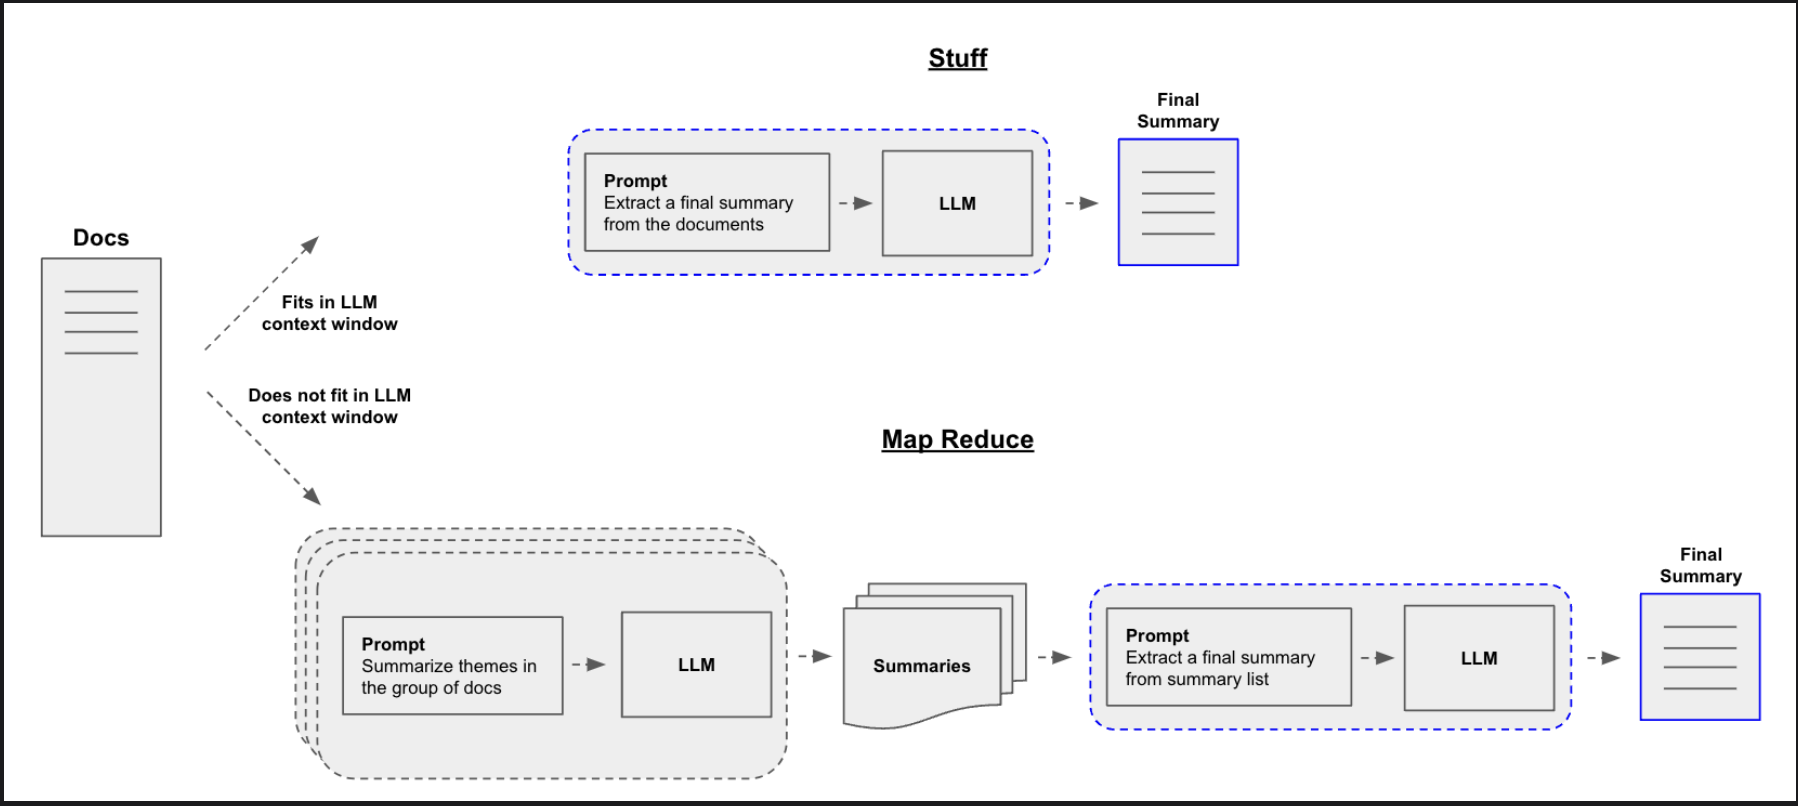

##### Step1 : Function to get Number of Tokens

In [7]:
def num_of_tokens(page_content:str, model_name:str):
    """
        Function : Provides the token length based on the model provide

        Args: 
            A document contains the page content

        Returns:
            Returns the length of Tokenized document
    """

    encoding = tiktoken.encoding_for_model(model_name=model_name)
    encoding_len = len(encoding.encode(page_content))

    return encoding_len 


##### Step2: Summarization Prompt Template

In [8]:
summarization_prompt_template = """ Write an extensive summary of the following:

{text}

SUMMARY: """

# Create a PromptTemplate object using the template string
summarization_prompt = PromptTemplate(
    template = summarization_prompt_template, 
    inputs = ["text"]
)

##### Step3: Function to create chapter summaries

In [9]:
def create_chapter_summary(chapter : Document):
    """
        Function : Creates a summary of chapter using large language models

        Args :
             A document object representing the chapter to summarize

        Returns:
            A document object returned contains summarization of the chapter
    """
    context_text = chapter.page_content

    # Stuff
    openai_model_nmae = "gpt-3.5-turbo-0125"
    openai_model_name_max_tokens = 16000
    llm_stuff = init_chat_model(openai_model_nmae, model_provider="openai")
    
    # Map Reduce
    llm_map_reduce = init_chat_model("gemini-2.5-flash",model_provider= "google_genai")
    gemini_2_5_flash_token_len = 1048576 # Maximum input token limit 

    # Get the encoding length 
    encoding_len = num_of_tokens(context_text, model_name=openai_model_nmae)
    
    if encoding_len < openai_model_name_max_tokens:
        chain = load_summarize_chain(
            llm = llm_stuff, 
            chain_type = "stuff", 
            verbose = False, 
            prompt = summarization_prompt 
        )
    else:
        chain = load_summarize_chain(
            llm = llm_map_reduce, 
            chain_type = "map_reduce",
            verbose = False, 
        )

    # Create a document object for the chapter
    chapter_doc =Document(page_content = context_text)

    # Generate the summary using the selected chain
    response = chain.invoke([chapter_doc])
    # Document the summarization and return 
    summary_doc =Document(
        page_content = response["output_text"], 
        metadata = chapter.metadata
    )

    return summary_doc

In [10]:
chapter_summaries = [] 
for chapter in tqdm(chapters):
    summary_doc = create_chapter_summary(chapter = chapter)    
    chapter_summaries.append(summary_doc)

display(Markdown(chapter_summaries[16].page_content))
print(f"=========={chapter_summaries[16].metadata} ==================")

  0%|          | 0/17 [00:00<?, ?it/s]

E0000 00:00:1759098198.783007 3962742 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
100%|██████████| 17/17 [00:54<00:00,  3.18s/it]


Chapter seventeen of Harry Potter and the Philosopher's Stone is titled "The Man with Two Faces." In this chapter, Harry comes face to face with Professor Quirrell, the man behind the events that have been happening at Hogwarts. Quirrell reveals that he has been working for Voldemort and that he was behind all the attempts to steal the Sorcerer's Stone. He explains that Snape was trying to save Harry, not harm him, and that he let the troll into the school intentionally.

Quirrell tries to get the Stone from the Mirror of Erised but is unable to because he only wants to use it, not find it. Harry accidentally ends up with the Stone in his pocket and is confronted by Quirrell and Voldemort, who reveals his true form as a face on the back of Quirrell's head. Quirrell is unable to touch Harry because of the protection left by his mother's sacrifice. In a final showdown, Harry manages to defeat Quirrell by touching him, causing him to burn and Voldemort to flee.

After the battle, Dumbledore awards points to Harry, Ron, Hermione, and Neville for their bravery and courage. Gryffindor ties with Slytherin for the house cup, and the decorations in the Great Hall change to reflect this. The students board the Hogwarts Express and head back to the Muggle world for the summer holidays.

Overall, the chapter highlights themes of bravery, sacrifice, and the power of love. It also sets the stage for future events in the Harry Potter series.

=========={'chapter': 17} ==================


In [11]:
try:
    serialized_chapter_summaries = dumps(chapter_summaries)
    with open("../data/ingestion_processed/serialized_chapter_summaries.json", "w") as f:
        f.write(serialized_chapter_summaries)
    print("==== SUCCESS : LANGCHAIN SERIALIZED OBJECT -> CHAPTER SUMMARIES ====")        
except:
    print("==== FAILURE: LANGCHAIN SERIALIZED OBJECT -> CHAPTER SUMMARIES ====")

==== SUCCESS : LANGCHAIN SERIALIZED OBJECT -> CHAPTER SUMMARIES ====


#### Step 4 : Let's load the Chapter Summaries

In [12]:
try:
    with open("../data/ingestion_processed/serialized_chapter_summaries.json", "r") as f:
        serialized_chapter_summaries = f.read()
    chapter_summaries = loads(serialized_chapter_summaries)
    print("==== SUCCESS LOAD: LANGCHAIN SERIALIZED OBJECT -> CHAPTER SUMMARIES ====")        
except:
    print("==== FAILURE LOAD: LANGCHAIN SERIALIZED OBJECT -> CHAPTER SUMMARIES ====")

==== SUCCESS LOAD: LANGCHAIN SERIALIZED OBJECT -> CHAPTER SUMMARIES ====


#### Step 4: Extract Book Quotes 

In [13]:
def text_preprocessing(text: str):
    text = re.sub(r"\s+", " ", chapters[0].page_content.replace("\n", " ")).strip()
    text = html.unescape(text)
    normalized = text.replace('\r', ' ').replace('\n', ' ')
    normalized = normalized.replace('“', '"').replace('”', '"').replace('„', '"').replace('‟', '"')
    normalized = re.sub(r'\s+', ' ', normalized).strip()
    return normalized 


In [16]:
def extract_book_quotes_as_documents(documents, min_length=50):
    """
    Extracts quotes from documents and returns them as separate Document objects.

    Args:
        documents (list): List of Document objects to extract quotes from.
        min_length (int, optional): Minimum length of quotes to extract. Defaults to 50.

    Returns:
        list: List of Document objects containing extracted quotes.
    """
    quotes_as_documents = []
    # Pattern for quotes longer than min_length characters, including line breaks
    quote_pattern_longer_than_min_length = re.compile(rf'"(.{{{min_length},}}?)"', re.DOTALL)

    for doc in documents:
        content = doc.page_content
        content = text_preprocessing(content) # content need to be preprocessed to find the quotes
        content = content.replace('\n', ' ')
        found_quotes = quote_pattern_longer_than_min_length.findall(content)
        
        for quote in found_quotes:
            quote_doc = Document(page_content=quote)
            quotes_as_documents.append(quote_doc)
    
    return quotes_as_documents

In [17]:
quotes_documents = extract_book_quotes_as_documents(chapters, min_length = 50)
print(f"Total Number of Quotes Documents : {len(quotes_documents)}")

Total Number of Quotes Documents : 1173


In [18]:
try:
    serialized_quotes_documents = dumps(quotes_documents)
    with open("../data/ingestion_processed/serialized_quotes_documents.json", "w") as f:
        f.write(serialized_quotes_documents)
    print("==== SUCCESS : LANGCHAIN SERIALIZED OBJECT -> QUOTE DOCUMENTS ====")        
except:
    print("==== FAILURE: LANGCHAIN SERIALIZED OBJECT -> QUOTE DOCUMENTS ====")

==== SUCCESS : LANGCHAIN SERIALIZED OBJECT -> QUOTE DOCUMENTS ====
